예시 데이터

In [9]:
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

word_list = "i feel hungry".split(" ")
print(word_list)

['i', 'feel', 'hungry']


데이터 사전 생성하기

In [10]:
index_to_word = {}

index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


{텍스트:인덱스} 구조로 변경

In [11]:
word_to_index = { word: index for index, word in index_to_word.items()}

print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [12]:
print(word_to_index["i"])

3


In [13]:
def get_encoded_sentence(sentence, word_to_index):
    index_to_word = [word_to_index[word] for word in sentence.split(" ")]
    return [word_to_index["<BOS>"], *index_to_word]

In [14]:
print(get_encoded_sentence("i eat lunch", word_to_index))

[1, 3, 6, 7]


In [15]:
def get_encoded_sentences(sentences, word_to_index):
    return [ get_encoded_sentence(sentence, word_to_index) for sentence in sentences ]

In [16]:
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [17]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return [ index_to_word[index] for index in encoded_sentence ]

In [18]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    decoded_sentences = []
    for sentence in encoded_sentences:
        decoded_sentence = get_decoded_sentence(sentence, index_to_word)
        decoded_sentences.append(decoded_sentence)
    return decoded_sentences

In [19]:
get_decoded_sentences(encoded_sentences, index_to_word)

[['<BOS>', 'i', 'feel', 'hungry'],
 ['<BOS>', 'i', 'eat', 'lunch'],
 ['<BOS>', 'now', 'i', 'feel', 'happy']]

## Embedding Layer

임베딩 레이어로 표현

In [20]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)
word_vector_dim = 4

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

raw_inputs = np.array(encoded_sentences, dtype="object")
print(raw_inputs)

[list([1, 3, 4, 5]) list([1, 3, 6, 7]) list([1, 8, 3, 4, 9])]


In [21]:
outputs = embedding(raw_inputs) # 임베딩 에러 발생 (패딩 맞춰주기)

print(outputs)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [22]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                          value=word_to_index["<PAD>"],
                                                          padding="post",
                                                          maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


In [23]:
outputs = embedding(raw_inputs)
print(outputs)

tf.Tensor(
[[[-0.02789239  0.04019872  0.04477923 -0.02439362]
  [ 0.03115321 -0.0448685  -0.00465875  0.03110829]
  [-0.00520629  0.01427377  0.04863175  0.03370607]
  [-0.00397205  0.00533916 -0.0271798   0.03812668]
  [-0.03188405  0.04165259  0.04827013 -0.03143971]]

 [[-0.02789239  0.04019872  0.04477923 -0.02439362]
  [ 0.03115321 -0.0448685  -0.00465875  0.03110829]
  [-0.04905243  0.04344526  0.03848826  0.03478395]
  [-0.02331758 -0.01748643  0.03352339 -0.01480783]
  [-0.03188405  0.04165259  0.04827013 -0.03143971]]

 [[-0.02789239  0.04019872  0.04477923 -0.02439362]
  [ 0.02236375 -0.03017601  0.01499372  0.03752429]
  [ 0.03115321 -0.0448685  -0.00465875  0.03110829]
  [-0.00520629  0.01427377  0.04863175  0.03370607]
  [ 0.03346881  0.00306334 -0.03817173  0.01210107]]], shape=(3, 5, 4), dtype=float32)


RNN 모델

In [24]:
from tensorflow.keras import layers

vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(layers.Input(shape=(None, )))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim))
model.add(layers.LSTM(8))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


CNN 모델

In [25]:

vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(layers.Input(shape=(None,)))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim))
model.add(layers.Conv1D(16, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(16, 7, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [26]:
# GlobalMaxPooling1D 하나만 사용해 가장 중요한 단어만 피쳐로 추출
vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(layers.Input(shape=(None,)))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## IMDB 영화리뷰 감성분석

### 1) 데이터셋 분석
- IMDb Large Movie dataset은 50000개의 영어로 작성된 영어 리뷰 텍스트이다.
- 긍정은 1, 부정은 0으로 라벨링 되어있다,

In [45]:
imdb = tf.keras.datasets.imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10_000)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [46]:
# 텍스트 데이터 확인
print("첫번째 문장 데이터", len(X_train[0]), X_train[0])
print("첫번째 문장 label", y_train[0])
print("두번째 문장 데이터", len(X_train[1]), X_train[1])

첫번째 문장 데이터 218 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 문장 label 1
두번째 문장 데이터 189 [1, 194, 1153, 

In [47]:
word_to_index = imdb.get_word_index()
index_to_word = { index: word for word, index in word_to_index.items() }
print(index_to_word[1])
print(word_to_index["the"])

the
1


In [48]:
# text decode
decoded_sentence = get_decoded_sentence(X_train[0], index_to_word)
print(decoded_sentence) # 문장이 이상한걸 볼 수 있음

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'musicians', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 

In [49]:
# tensorflow 에서 제공하는 가이드 대로 처리

word_to_index = { k:v+3 for k, v in word_to_index.items() }

word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["<UNUSED>"] = 3

index_to_word = { index: word for word, index in word_to_index.items() }

decoded_sentence = get_decoded_sentence(X_train[0], index_to_word)
print(decoded_sentence)

['<BOS>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '<UNK>', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '<UNK>', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '<UNK>', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at'

In [50]:
print(" ".join(decoded_sentence))

<BOS> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what 

In [51]:
# 문장의 최대 길이 설정
# 표준편차를 반영해 지정

total_data_text = list(X_train) + list(X_test)

# 각 길이를 전부 구하기
list_text_size = np.array([len(text) for text in total_data_text])
# 구한 길이의 평균을 구하기
mean = list_text_size.mean()
# 최대 길이
max = list_text_size.max()
# 표준편차 구하기
std = list_text_size.std()
# 최대 길이 정하기
max_len = int(mean + 2 * std)
print("mean", mean)
print("max", max)
print("std", std)
print("max_len", max_len)
rate = (list_text_size < max_len).sum() / len(list_text_size)
print(f"전체 데이터 비율 {rate:0.3f}%")

mean 234.75892
max 2494
std 172.91149458735703
max_len 580
전체 데이터 비율 0.945%


In [55]:
# 문장 길이 통일: pad_sequences
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                             value=word_to_index["<PAD>"],
                             padding="post",
                             maxlen=max_len)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                             value=word_to_index["<PAD>"],
                             padding="post",
                             maxlen=max_len)

print(X_train.shape)

(25000, 580)


RNN 모델 설계

In [56]:
vocab_size = 10_000
word_vector_dim = 16

pre_model = tf.keras.Sequential()
pre_model.add(layers.Input(shape=(None,)))
pre_model.add(layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True))
pre_model.add(layers.LSTM(16))
pre_model.add(layers.Dense(8, activation="relu"))
pre_model.add(layers.Dense(1, activation="sigmoid"))

pre_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 162,257
Trainable params: 162,257
Non-trainable params: 0
_________________________________________________________________


In [57]:
# train test 분리

n_split = 10_000

X_valid = X_train[:n_split]
y_valid = y_train[:n_split]

_X_train = X_train[n_split:]
_y_train = y_train[n_split:]

print(X_train.shape, y_train.shape)

(25000, 580) (25000,)


In [58]:
print(_X_train.shape, _y_train.shape)

(15000, 580) (15000,)


In [63]:
pre_model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

history = pre_model.fit(_X_train, _y_train, epochs=10,
              validation_data=(X_valid, y_valid),
              batch_size=512,
              verbose=1)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 356ms/step - accuracy: 0.5480 - loss: 0.6919 - val_accuracy: 0.6845 - val_loss: 0.6822
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.7337 - loss: 0.6588 - val_accuracy: 0.6496 - val_loss: 0.6012
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.7936 - loss: 0.5040 - val_accuracy: 0.8387 - val_loss: 0.4174
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.8728 - loss: 0.3662 - val_accuracy: 0.8598 - val_loss: 0.3488
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9044 - loss: 0.2715 - val_accuracy: 0.8761 - val_loss: 0.3121
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.9308 - loss: 0.2131 - val_accuracy: 0.8806 - val_loss: 0.3100
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.9455 - loss: 0.1703 - val_accuracy: 0.8774 - val_loss: 0.3060
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.9521 - loss: 0.1531 - val_accu

In [64]:
result = pre_model.evaluate(X_valid, y_valid, verbose=2)

313/313 - 5s - 17ms/step - accuracy: 0.8735 - loss: 0.3738


In [65]:
print(result)

[0.37380746006965637, 0.8734999895095825]


In [66]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Matplotlib is building the font cache; this may take a moment.


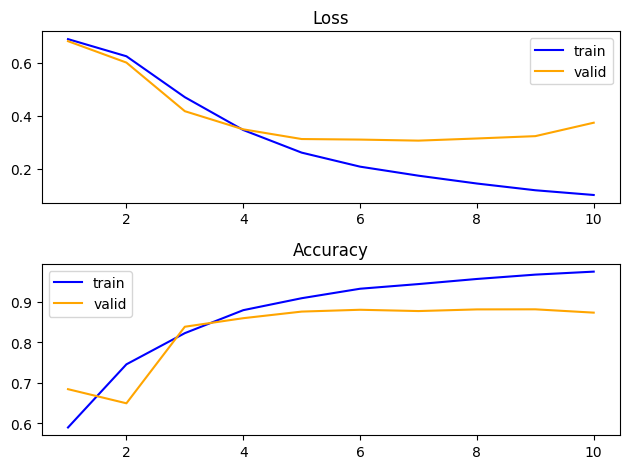

In [67]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.subplot(211)
plt.title("Loss")
plt.plot(range(1, len(history_dict["loss"])+1), history_dict["loss"], color="blue", label="train")
plt.plot(range(1, len(history_dict["val_loss"])+1), history_dict["val_loss"], color="orange", label="valid")
plt.legend()

plt.subplot(212)
plt.title("Accuracy")
plt.plot(range(1, len(history_dict["accuracy"])+1), history_dict["accuracy"], color="blue", label="train")
plt.plot(range(1, len(history_dict["val_accuracy"])+1), history_dict["val_accuracy"], color="orange", label="valid")
plt.legend()

plt.tight_layout()
plt.show()

임베딩 벡터 시각화

In [70]:
# 임베딩 layer 가중치 load
embedding_layer = pre_model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 16)


In [72]:
# 가중치 저장
word2vec_file_path = "./word2vec.txt"
f = open(word2vec_file_path, "w")
f.write(f"{vocab_size-4} {word_vector_dim}\n")

for index in range(4, vocab_size):
    f.write(f"{index_to_word[index]} {' '.join(map(str, list(weights[index, :])))}\n")
f.close()

In [73]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vectors = word_vectors["computer"]
vectors

array([-0.01912316, -0.03040017, -0.05104592,  0.00971173, -0.0525858 ,
        0.0559232 , -0.0456727 , -0.07210279,  0.06387356, -0.01407711,
       -0.00461364,  0.00680848,  0.03287873,  0.01207027,  0.01744706,
       -0.00687115], dtype=float32)

In [74]:
# 벡터 유사도 확인
word_vectors.similar_by_word("love")

[('riders', 0.9116602540016174),
 ('recall', 0.9081259369850159),
 ('constructed', 0.9027981162071228),
 ('brilliant', 0.901128351688385),
 ('highest', 0.9002612233161926),
 ('worth', 0.898676335811615),
 ('mastermind', 0.8974437713623047),
 ('1936', 0.8963649868965149),
 ('viewing', 0.8959065079689026),
 ('amazing', 0.8954025506973267)]

## 사전 학습 된 Google 의 Word2Vec 모델

In [3]:
import os
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
print(vector.shape)    # 무려 300dim의 워드 벡터입니다.

(300,)


In [4]:
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [37]:
# 이전 학습 모델 재 학습
import numpy as np

vocab_size = 10000
word_vector_dim = 300
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [41]:
from tensorflow.keras.initializers import Constant
import tensorflow as tf

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=max_len, 
                                 trainable=True))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [59]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(_X_train,
                    _y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 21s 94ms/step - loss: 0.6888 - accuracy: 0.5427 - val_loss: 0.6823 - val_accuracy: 0.5771
Epoch 2/20
30/30 [==============================] - 2s 74ms/step - loss: 0.6628 - accuracy: 0.6227 - val_loss: 0.6449 - val_accuracy: 0.6362
Epoch 3/20
30/30 [==============================] - 2s 74ms/step - loss: 0.5667 - accuracy: 0.7445 - val_loss: 0.4826 - val_accuracy: 0.7898
Epoch 4/20
30/30 [==============================] - 2s 75ms/step - loss: 0.3746 - accuracy: 0.8498 - val_loss: 0.3305 - val_accuracy: 0.8617
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 0.2607 - accuracy: 0.8949 - val_loss: 0.2992 - val_accuracy: 0.8740
Epoch 6/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1975 - accuracy: 0.9313 - val_loss: 0.2905 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1569 - accuracy: 0.9466 - val_loss: 0.2965 - val_accuracy: 0.8778
Epoch 8/20
3

In [60]:
results = model.evaluate(X_valid, y_valid, verbose=2)
print(results)

313/313 - 1s - loss: 0.5490 - accuracy: 0.8652
[0.5490231513977051, 0.8651999831199646]
